In [ ]:
from pycaret.utils import version
version()

In [1]:
import pandas as pd
data = pd.read_csv('./data/cs-training.csv')

In [2]:
# initializing setup
from pycaret.classification import *
clf2 = setup(data, target='SeriousDlqin2yrs', numeric_features=['NumberOfTime30-59DaysPastDueNotWorse',
                                                                'NumberOfTimes90DaysLate',
                                                                'NumberOfTime60-89DaysPastDueNotWorse',
                                                                'NumberOfDependents'],
             fix_imbalance = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,6126
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(150000, 12)"
4,Missing Values,True
5,Numeric Features,11
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [3]:
# compare all baseline models and select top 5
top5 = compare_models(n_select=5, sort='AUC', turbo=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.9363,0.8616,0.2296,0.5571,0.3251,0.2977,0.3303,1.4324
1,CatBoost Classifier,0.9351,0.8599,0.2050,0.5381,0.2969,0.2700,0.3050,12.8907
2,Extreme Gradient Boosting,0.9350,0.8555,0.2059,0.5370,0.2975,0.2704,0.3052,13.5667
3,Gradient Boosting Classifier,0.9292,0.8541,0.3349,0.4600,0.3875,0.3510,0.3560,26.8174
4,Ada Boost Classifier,0.9164,0.8404,0.4333,0.3883,0.4093,0.3645,0.3653,5.8531
5,Extra Trees Classifier,0.9293,0.8304,0.2865,0.4543,0.3512,0.3158,0.3253,2.5105
6,Logistic Regression,0.8553,0.8073,0.5831,0.2557,0.3541,0.2877,0.3189,0.8100
7,Quadratic Discriminant Analysis,0.8282,0.7916,0.6281,0.2365,0.3391,0.2678,0.3102,0.0399
8,Random Forest Classifier,0.9298,0.7887,0.2196,0.4494,0.2948,0.2624,0.2813,0.5340
9,Naive Bayes,0.9331,0.7082,0.0578,0.4936,0.1026,0.0901,0.1501,0.0250


In [4]:
# tune top 5 base models
tuned_top5 = [tune_model(i, optimize='AUC') for i in top5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9387,0.8623,0.2211,0.6126,0.3249,0.3002,0.3436
1,0.9343,0.8540,0.2094,0.5213,0.2988,0.2708,0.3022
2,0.9381,0.8690,0.2450,0.5890,0.3461,0.3193,0.3536
3,0.9365,0.8738,0.2350,0.5593,0.3310,0.3034,0.3352
4,0.9340,0.8578,0.1994,0.5166,0.2878,0.2602,0.2931
5,0.9352,0.8676,0.2066,0.5410,0.2990,0.2721,0.3072
6,0.9353,0.8636,0.2151,0.5412,0.3078,0.2805,0.3138
7,0.9360,0.8631,0.2123,0.5560,0.3072,0.2806,0.3169
8,0.9375,0.8577,0.2308,0.5827,0.3306,0.3042,0.3406
9,0.9354,0.8609,0.2140,0.5415,0.3067,0.2795,0.3131


IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:46:34
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


KeyboardInterrupt: 

In [ ]:
bagged_top5 = [ensemble_model(i, optimize='AUC') for i in tuned_top5]

In [ ]:
blender = blend_models(estimator_list=top5, optimize='AUC')

In [ ]:
best = automl(optimize='AUC')

In [ ]:
final = finalize_model(best)
final

In [ ]:
# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]

# blend top 5 base models
blender = blend_models(estimator_list = top5)

# select best model
best = automl(optimize = 'AUC')

# finalize model
final_clf = finalize_model(best)

In [ ]:
# prediction
test_data = pd.read_csv('data/cs-test.csv')
predictions = predict_model(final, data=test_data)
predictions

In [ ]:
import numpy as np
submission_scores = predictions['Score']
submission_scores
ids = np.arange(1, 101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_scores})
submission.to_csv('submission_pycaret.csv', index=False)

In [ ]:
!mlflow ui

In [ ]:
from sklearn_porter import Porter

porter = Porter(final, language='js')
output = porter.export(embed_data=True)

print(output)

# with open('AdaBoostClassifier.js', 'w') as f:
#     f.write(output)

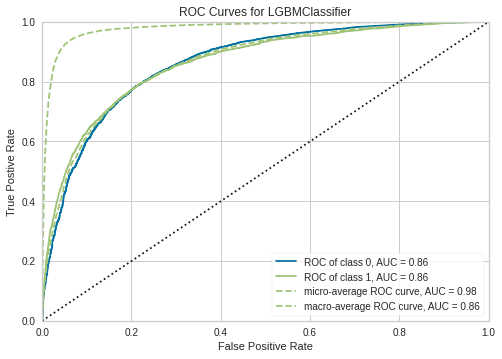

In [11]:
plot_model(top5[0], plot='auc')

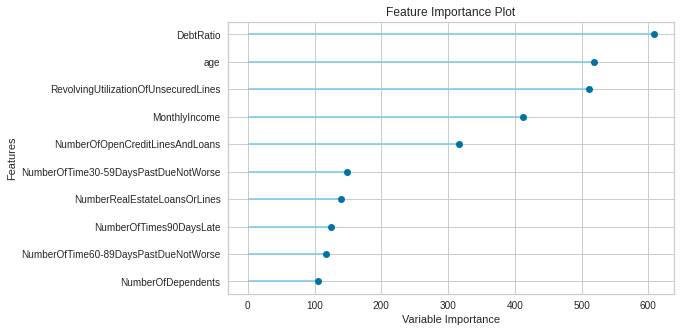

In [12]:
plot_model(top5[0], plot='feature')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4760, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


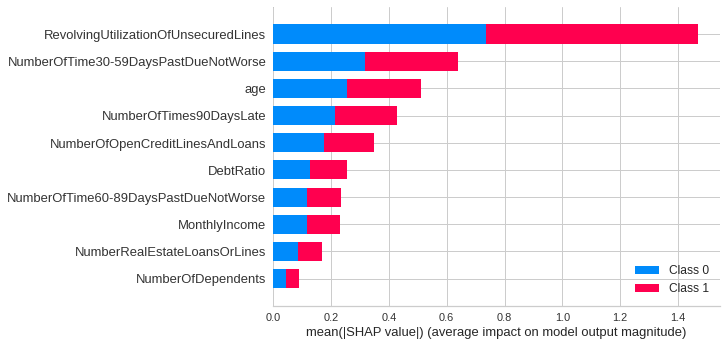

In [14]:
interpret_model(top5[0])

In [15]:
interpret_model(top5[0], plot = 'reason', observation = 10)


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4760, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=reason, feature=None, observation=10)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:model type detected: LGBMClassifier
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [2]:
import pandas as pd
from pycaret.classification import *
data = pd.read_csv('./data/cs-training.csv')
# initializing setup
clf2 = setup(data, target='SeriousDlqin2yrs', numeric_features=['NumberOfTime30-59DaysPastDueNotWorse',
                                                                'NumberOfTimes90DaysLate',
                                                                'NumberOfTime60-89DaysPastDueNotWorse',
                                                                'NumberOfDependents'],
             fix_imbalance=True)
# compare all baseline models and select top 3
top3 = compare_models(n_select=3, sort='AUC', turbo=True)
# tune top 3 base models
tuned_top3 = [tune_model(i, optimize='AUC') for i in top3]
bagged_top3 = [ensemble_model(i, optimize='AUC') for i in tuned_top3]
blender = blend_models(estimator_list=top3, optimize='AUC')
best = automl(optimize='AUC')
calibrated_best = calibrate_model(best)
save_model(calibrated_best, 'calibrated_best_saved_07032020')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9324,0.8350,0.1940,0.4840,0.2770,0.2483,0.2772
1,0.9353,0.8178,0.2379,0.5370,0.3297,0.3010,0.3288
2,0.9328,0.8362,0.2179,0.4935,0.3024,0.2726,0.2980
3,0.9365,0.8404,0.2208,0.5636,0.3173,0.2906,0.3262
4,0.9341,0.8408,0.2436,0.5151,0.3308,0.3007,0.3242
5,0.9330,0.8348,0.2123,0.4983,0.2977,0.2685,0.2957
6,0.9334,0.8212,0.2236,0.5048,0.3100,0.2804,0.3063
7,0.9348,0.8246,0.2066,0.5311,0.2974,0.2701,0.3037
8,0.9337,0.8339,0.1980,0.5110,0.2854,0.2577,0.2900
9,0.9362,0.8295,0.2225,0.5552,0.3177,0.2906,0.3245


SystemExit: (Type Error): CatBoost Classifier not supported in this function.

In [3]:
blender = blend_models(estimator_list=top3, optimize='AUC')

SystemExit: (Type Error): CatBoost Classifier not supported in this function.

In [4]:
best = automl(optimize='AUC')
calibrated_best = calibrate_model(best)
save_model(calibrated_best, 'calibrated_best_saved_07032020')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9358,0.8431,0.2254,0.5467,0.3192,0.2916,0.3235
1,0.9376,0.8310,0.2350,0.5830,0.3350,0.3085,0.3439
2,0.9366,0.8487,0.2165,0.5672,0.3134,0.2871,0.3242
3,0.9390,0.8564,0.2336,0.6165,0.3388,0.3136,0.3548
4,0.9378,0.8542,0.2493,0.5814,0.3490,0.3217,0.3539
5,0.9353,0.8455,0.2023,0.5441,0.2949,0.2684,0.3050
6,0.9357,0.8376,0.2179,0.5484,0.3119,0.2847,0.3185
7,0.9376,0.8436,0.2137,0.5929,0.3141,0.2889,0.3309
8,0.9352,0.8452,0.2009,0.5423,0.2931,0.2666,0.3033
9,0.9370,0.8437,0.2126,0.5775,0.3107,0.2851,0.3248


Transformation Pipeline and Model Succesfully Saved


In [22]:
final_best = finalize_model(calibrated_best)

In [27]:
save_model(final_best, 'final_best_saved_07032020')

Transformation Pipeline and Model Succesfully Saved


In [5]:
!mlflow ui

[2020-08-05 14:25:23 +0800] [387745] [INFO] Starting gunicorn 20.0.4
[2020-08-05 14:25:23 +0800] [387745] [INFO] Listening at: http://127.0.0.1:5000 (387745)
[2020-08-05 14:25:23 +0800] [387745] [INFO] Using worker: sync
[2020-08-05 14:25:23 +0800] [387748] [INFO] Booting worker with pid: 387748
^C

Aborted!
[2020-08-05 15:15:18 +0800] [387745] [INFO] Handling signal: int
[2020-08-05 15:15:18 +0800] [387748] [INFO] Worker exiting (pid: 387748)


In [25]:
final_best

CalibratedClassifierCV(base_estimator=BaggingClassifier(base_estimator=<catboost.core.CatBoostClassifier object at 0x7f8526c65630>,
                                                        bootstrap=True,
                                                        bootstrap_features=False,
                                                        max_features=1.0,
                                                        max_samples=1.0,
                                                        n_estimators=10,
                                                        n_jobs=-1,
                                                        oob_score=False,
                                                        random_state=1559,
                                                        verbose=0,
                                                        warm_start=False),
                       cv=10, method='sigmoid')

In [6]:
final_best = load_model('final_best_saved_07032020')[1]

Transformation Pipeline and Model Sucessfully Loaded


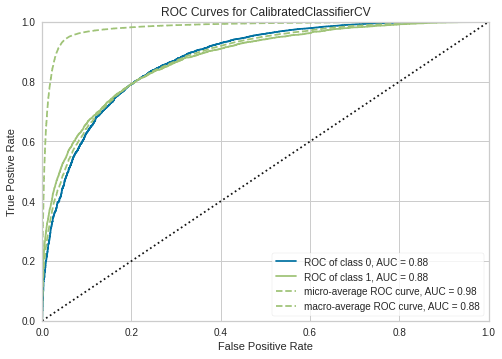

In [7]:
plot_model(final_best, plot='auc')

In [9]:
plot_model(final_best, plot='feature')

SystemExit: (Type Error): Feature Importance plot not available for estimators that doesnt support coef_ or feature_importances_ attribute.

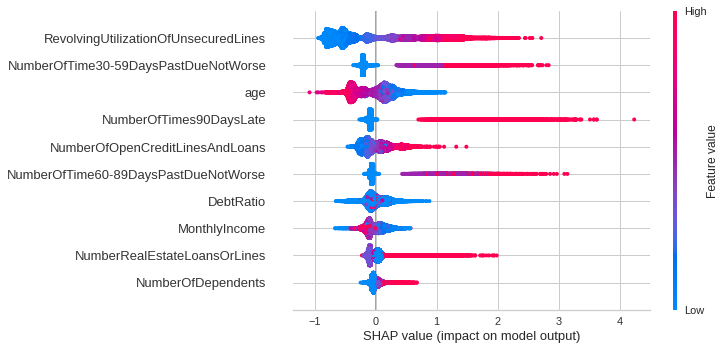

In [19]:
interpret_model(tuned_top3[1])

In [20]:
interpret_model(tuned_top3[1], plot = 'reason', observation = 10)

In [23]:
# prediction
test_data = pd.read_csv('data/cs-test.csv')
predictions = predict_model(final_best, data=test_data)
predictions

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Label,Score
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,0,0.0425
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,0,0.0379
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,0,0.0304
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,0,0.0473
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,0,0.0646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0,0,0.0385
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0,0,0.3137
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN,0,0.0281
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0,0,0.0411


In [24]:
import numpy as np
submission_scores = predictions['Score']
submission_scores
ids = np.arange(1, 101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_scores})
submission.to_csv('submission_pycaret_automl.csv', index=False)